## Load datasets
- https://www.kaggle.com/imdevskp/corona-virus-report#covid_19_clean_complete.csv

In [1]:
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [2]:
df_daily_case = pd.read_csv('covid_19_clean_complete.csv')
df_daily_case.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0


In [3]:
df_daily_case.isnull().sum()

Province/State    9882
Country/Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [4]:
df_daily_case.drop(['Province/State'], axis=1, inplace=True)

In [5]:
df_daily_case['Date'] = pd.to_datetime(df_daily_case['Date'])

df_daily_case['month'] = df_daily_case['Date'].dt.month
df_daily_case['day'] = df_daily_case['Date'].dt.day

df_daily_case.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,month,day
0,Thailand,15.0000,101.0000,2020-01-22,2,0,0,1,22
1,Japan,36.0000,138.0000,2020-01-22,2,0,0,1,22
2,Singapore,1.2833,103.8333,2020-01-22,0,0,0,1,22
3,Nepal,28.1667,84.2500,2020-01-22,0,0,0,1,22
4,Malaysia,2.5000,112.5000,2020-01-22,0,0,0,1,22


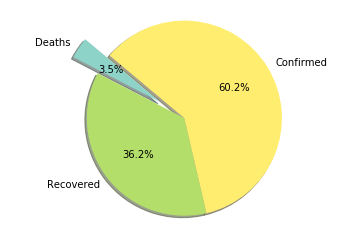

In [6]:
labels = ['Deaths', 'Recovered','Confirmed']
sizes = df_daily_case[labels].sum()
sizes['Confirmed'] = sizes['Confirmed'] - sizes['Recovered'] - sizes['Deaths']

explode = np.zeros(sizes.shape[0])
explode[0] = 0.3
colors = cm.get_cmap('Set3', sizes.shape[0]).colors

plt.pie(sizes, labels=labels, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [8]:
from shapely.geometry import Point, Polygon
import descartes
import geopandas
df_daily_case = geopandas.GeoDataFrame(df_daily_case,
                               geometry=geopandas.points_from_xy(df_daily_case['Long'],df_daily_case['Lat']))


In [16]:
import geopandas

def plot_countries(df, title):
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    ax = world.plot(figsize=(20,5), linewidth=0.25, edgecolor='white', color='lightgrey')
    ax.set_title(title)
    df.plot(ax=ax, color='tomato')
    plt.savefig(title, dpi=300)
    plt.show()

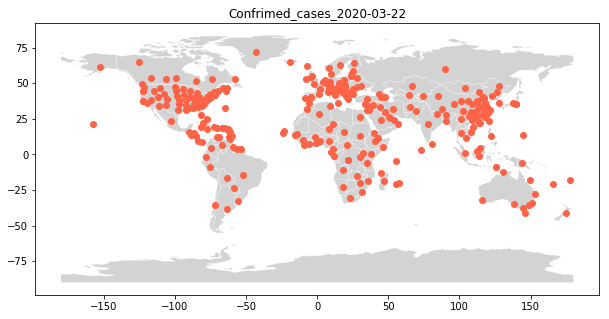

In [17]:
from IPython.display import clear_output    
import time
for d in df_daily_case['Date'].unique():
    clear_output(wait=True)
    df_aux = df_daily_case[df_daily_case['Date']==d]
    df_aux = df_aux[df_aux['Confirmed']>0]
    plot_countries(df_aux, 'Confrimed_cases_' + np.datetime_as_string(d, 'D'))
    time.sleep(0.1)

In [22]:

for i in *.png; do echo $i; done

Confrimed_cases_2020-01-22.png
Confrimed_cases_2020-01-23.png
Confrimed_cases_2020-01-24.png
Confrimed_cases_2020-01-25.png
Confrimed_cases_2020-01-26.png
Confrimed_cases_2020-01-27.png
Confrimed_cases_2020-01-28.png
Confrimed_cases_2020-01-29.png
Confrimed_cases_2020-01-30.png
Confrimed_cases_2020-01-31.png
Confrimed_cases_2020-02-01.png
Confrimed_cases_2020-02-02.png
Confrimed_cases_2020-02-03.png
Confrimed_cases_2020-02-04.png
Confrimed_cases_2020-02-05.png
Confrimed_cases_2020-02-06.png
Confrimed_cases_2020-02-07.png
Confrimed_cases_2020-02-08.png
Confrimed_cases_2020-02-09.png
Confrimed_cases_2020-02-10.png
Confrimed_cases_2020-02-11.png
Confrimed_cases_2020-02-12.png
Confrimed_cases_2020-02-13.png
Confrimed_cases_2020-02-14.png
Confrimed_cases_2020-02-15.png
Confrimed_cases_2020-02-16.png
Confrimed_cases_2020-02-17.png
Confrimed_cases_2020-02-18.png
Confrimed_cases_2020-02-19.png
Confrimed_cases_2020-02-20.png
Confrimed_cases_2020-02-21.png
Confrimed_cases_2020-02-22.png
Confrime

In [26]:
%%bash
for i in *.png; do sips -s format jpeg -s formatOptions 70 "${i}" --out "${i%png}jpg"; done
convert -delay 20 -loop 0 *.jpg confirmed_cases.gif
rm *.jpg
rm *.png

/Users/rootstrap/Projects/coronavirus-analysis/Confrimed_cases_2020-01-22.png
  /Users/rootstrap/Projects/coronavirus-analysis/Confrimed_cases_2020-01-22.jpg
/Users/rootstrap/Projects/coronavirus-analysis/Confrimed_cases_2020-01-23.png
  /Users/rootstrap/Projects/coronavirus-analysis/Confrimed_cases_2020-01-23.jpg
/Users/rootstrap/Projects/coronavirus-analysis/Confrimed_cases_2020-01-24.png
  /Users/rootstrap/Projects/coronavirus-analysis/Confrimed_cases_2020-01-24.jpg
/Users/rootstrap/Projects/coronavirus-analysis/Confrimed_cases_2020-01-25.png
  /Users/rootstrap/Projects/coronavirus-analysis/Confrimed_cases_2020-01-25.jpg
/Users/rootstrap/Projects/coronavirus-analysis/Confrimed_cases_2020-01-26.png
  /Users/rootstrap/Projects/coronavirus-analysis/Confrimed_cases_2020-01-26.jpg
/Users/rootstrap/Projects/coronavirus-analysis/Confrimed_cases_2020-01-27.png
  /Users/rootstrap/Projects/coronavirus-analysis/Confrimed_cases_2020-01-27.jpg
/Users/rootstrap/Projects/coronavirus-analysis/Confr

In [32]:
%%bash
rm *.jpg
rm *.png